<a href="https://colab.research.google.com/github/JohanPL95/primer_action/blob/main/Bitcoin_Phrophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prophet Intro

 Es especialmente adecuado para:

- Datos horarios, diarios o semanales con suficientes datos hist√≥ricos.
- M√∫ltiples modelos estacionales relacionados con el comportamiento humano (d√≠a de la semana, estaciones).
- D√≠as festivos importantes con espacios irregulares
- Falta una cantidad razonable de datos.
- Cambios de tendencias hist√≥ricas.
- Tendencias de crecimiento no lineal con saturaci√≥n (l√≠mites de capacidad, etc.).

Prophet modela series temporales como un modelo aditivo generalizado (GAM) que combina la funci√≥n de tendencia, la funci√≥n de estacionalidad, los efectos de las vacaciones y un t√©rmino de error en un solo modelo:

$$
y(t)= g(t)+ s(t)+h(t)+e_t
$$


- $ùëî(ùë°)$ : tendencia (cambios no peri√≥dicos)
- $ùë†(ùë°)$: estacionalidad (cambios peri√≥dicos)
- $‚Ñé(ùë°)$ : efecto vacaciones
- $e_ùë°$: t√©rmino de error, valor predeterminado anterior ùúñ‚àºùëÅ(0,0.5)

- **Puntos de cambio:** definen los cambios de tendencia. Pueden ser detectados por el propio algoritmo o tambi√©n pueden ser definidos y ajustados.
  
- **Estacionalidad:** define funciones peri√≥dicas que pueden afectar los datos de series temporales. De manera predeterminada, PROPHET considera la estacionalidad anual, semanal y diaria, e intenta identificar tendencias que representen estos efectos peri√≥dicos en los datos.
  
- **Feriados:** los d√≠as especiales (como feriados u otros eventos recurrentes) tambi√©n se pueden modelar con el modelo aditivo PROPHET. Las fechas se pueden agregar manualmente a trav√©s de un pandas.Dataframe, pero tambi√©n hay conjuntos de feriados integrados para alrededor de una docena de pa√≠ses.
  
- **Orden de Fourier:** referente a la funci√≥n de estacionalidad, este valor determina qu√© tan r√°pido puede cambiar y adaptarse, y tambi√©n implica un modelo m√°s ajustado (con el consiguiente riesgo de sobreajuste).
- **Par√°metros de tendencia**

| Par√°metro                 | Descripci√≥n                                                                                      |
|---------------------------|--------------------------------------------------------------------------------------------------|
| `growth`                  | "Linear" o "logistic" se usan para especificar si una tendencia es lineal o log√≠stica.           |
| `change points`           | Incluye fechas para posibles puntos de cambio (autom√°tico si no se especifica).                  |
| `n_changepoints`          | Si no se proporcionan puntos de cambio, puedes especificar el n√∫mero de puntos de cambio a incluir autom√°ticamente. |
| `changepoint_prior_scale` | Par√°metro para ajustar la flexibilidad de la selecci√≥n autom√°tica de puntos de cambio.           |

- **Estacionalidad y par√°metros vacacionales**

| Par√°metro               | Descripci√≥n                                                                         |
|-------------------------|-------------------------------------------------------------------------------------|
| `annual_seasonality`    | Para ajustar la estacionalidad anual.                                               |
| `weekly_seasonality`    | Para ajustar la estacionalidad semanal.                                             |
| `daily_seasonality`     | Ajusta la estacionalidad diaria.                                                    |
| `holidays`              | DataFrame de eventos que contiene el nombre y la fecha del d√≠a festivo.             |
| `season_prior_scale`    | Par√°metro para ajustar la fuerza del modelo de estacionalidad.                      |
| `holiday_prior_scale`   | Par√°metro para ajustar la fuerza del modelo de d√≠as festivos.                       |


- **Puntos de cambio de tendencia**
La tendencia de una serie temporal puede cambiar abruptamente. PROPHET intenta detectar estos cambios autom√°ticamente mediante un laplaciano o un exponencial doble a priori. De manera predeterminada, los puntos de cambio solo se ajustan para el primer 80 % de la serie temporal, lo que permite un margen suficiente para la previsi√≥n real.

Para ajustar los cambios de tendencia, podemos usar el par√°metro `changepoint_prior_scale`, que est√° configurado en 0,05 de forma predeterminada. Aumentar su valor har√≠a que la tendencia fuera m√°s flexible y reducir√≠a el desajuste.

Establezcamos el valor en 0,5, como sugiere la gu√≠a de documentaci√≥n de Prophet. Si queremos generar intervalos de incertidumbre para los componentes de tendencia y estacionalidad, debemos realizar un muestreo bayesiano completo, lo que se puede hacer utilizando el mcmc_samplespar√°metro en Prophet.


Prophet es una biblioteca de pron√≥stico de series temporales de Python desarrollada por Facebook. Prophet detecta autom√°ticamente la estacionalidad anual, semanal y diaria. Puede descomponer r√°pidamente los efectos de tendencia y estacionalidad.


- ¬øC√≥mo entrenar un modelo de pron√≥stico de series de tiempo usando Prophet?
- ¬øC√≥mo hacer predicciones y descomposici√≥n de series temporales?
- ¬øC√≥mo identificar puntos de cambio en la tendencia?
- ¬øC√≥mo hacer una validaci√≥n cruzada de series temporales?
- ¬øC√≥mo evaluar el rendimiento del modelo de series de tiempo usando Prophet?

### Paso 1: instalar e importar bibliotecas

In [ ]:
%pip install yfinance prophet


In [ ]:
import numpy as np
import pandas as pd


import yfinance as yf

# Prophet
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics

# VisualizaCION
import plotly.graph_objs as go

# Paso 2: obtenga datos de precios de Bitcoin

En el segundo paso, los datos del precio de Bitcoin se descargan de la API financiera de Yahoo. Estamos utilizando datos diarios de dos a√±os de 2018 y 2019.

Yahoo Finance descarga datos con la fecha como √≠ndice. Usando reset_index, creamos un nuevo √≠ndice y usamos la fecha como columna. Esto se debe a que Prophet requiere que la variable de fecha y hora sea una columna para la entrada del modelo.

De forma predeterminada, la fecha es un tipo de cadena, pd.to_datetimela cambia a un formato DateTime.

In [ ]:
# Descargar datos Bitcoin
data = yf.download(tickers='BTC-USD', start='2018-01-01', end='2024-08-30', interval = '1d')

# Restablecer el √≠ndice y tener la fecha como columna
data.reset_index(inplace=True)

# Cambiar la fecha al formato de fecha y hora
data['Date'] = pd.to_datetime(data['Date'])


data.head()

[*********************100%***********************]  1 of 1 completed


Date          Open          High           Low         Close  \
0 2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
1 2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2 2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
3 2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
4 2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   

      Adj Close       Volume  
0  13657.200195  10291200000  
1  14982.099609  16846600192  
2  15201.000000  16871900160  
3  15599.200195  21783199744  
4  17429.500000  23840899072

In [ ]:
# Declarar la figura
fig = go.Figure()

fig.add_trace(go.Candlestick(x=data.Date,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'],
                name = 'Bitcoin Data'))

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



**objetivo**  pronosticar el precio de cierre de Bitcoin. Prophet toma dos columnas como entradas, una columna de fecha y hora llamada "ds" y una columna de valor llamada "y". Por lo tanto, debemos eliminar todas las dem√°s columnas, cambiar el nombre de "Fecha" a "ds" y "Cerrar" a "y".


In [ ]:
# # Mantener solo la fecha y el precio de cierre
df = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

# Cambiar el nombre de la fecha a ds y cerrar el precio a y
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

df.head()

ds             y
0 2018-01-01  13657.200195
1 2018-01-02  14982.099609
2 2018-01-03  15201.000000
3 2018-01-04  15599.200195
4 2018-01-05  17429.500000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433 entries, 0 to 2432
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2433 non-null   datetime64[ns]
 1   y       2433 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.1 KB


# Paso 3: Train Test Split

crear un conjunto de datos de entrenamiento y de prueba. No podemos utilizar la divisi√≥n aleatoria para los datos de series temporales porque provoca una fuga de datos de fechas futuras a fechas pasadas. Por lo general, se selecciona una fecha l√≠mite. Los datos anteriores a la fecha l√≠mite son el conjunto de datos de entrenamiento y los datos posteriores a la fecha l√≠mite se utilizan como conjunto de datos de prueba.

En este ejemplo, se utiliza '2024‚Äì03‚Äì14' como fecha l√≠mite. Los primeros 23 meses se utilizan para la capacitaci√≥n del modelo y el √∫ltimo mes se usa para pruebas.

In [ ]:
# Train test split
df_train = df[df['ds']<='2024-06-29']
df_test = df[df['ds']>'2024-06-29']

# Print .
print('El conjunto de datos de entrenamiento tiene', len(df_train), 'que, van desde', df_train['ds'].min(), 'hasta', df_train['ds'].max())
print(' El conjunto de datos de prueba tiene', len(df_test), 'que, van desde', df_test['ds'].min(), 'hasta', df_test['ds'].max())

El conjunto de datos de entrenamiento tiene 2372 que, van desde 2018-01-01 00:00:00 hasta 2024-06-29 00:00:00
 El conjunto de datos de prueba tiene 61 que, van desde 2024-06-30 00:00:00 hasta 2024-08-29 00:00:00


In [ ]:
df_test

ds             y
2372 2024-06-30  62678.292969
2373 2024-07-01  62851.980469
2374 2024-07-02  62029.015625
2375 2024-07-03  60173.921875
2376 2024-07-04  56977.703125
...         ...           ...
2428 2024-08-25  64333.542969
2429 2024-08-26  62880.660156
2430 2024-08-27  59504.132812
2431 2024-08-28  59027.625000
2432 2024-08-29  59388.179688

[61 rows x 2 columns]

## Paso 4: Entrene el modelo de series temporales con Prophet


Entrenar el modelo de series de tiempo utilizando el conjunto de datos de entrenamiento.

- `interval_width` especifica el intervalo de predicci√≥n. Cambiamos el valor predeterminado del intervalo de predicci√≥n del 80% al 95%. Hace que el l√≠mite superior y el l√≠mite inferior de la predicci√≥n sean m√°s amplios.

- `n_changepoints` es el n√∫mero de puntos de cambio en la tendencia de la serie temporal. El valor predeterminado es 25. Seg√∫n la forma de los datos del precio de Bitcoin, se estableci√≥ en 7.

In [ ]:
# Crea el modelo con una confianza interna del 95%
m = Prophet(interval_width=0.95, n_changepoints=7)

# Ajusta el modelo
m.fit(df_train)

22:52:15 - cmdstanpy - INFO - Chain [1] start processing
22:52:15 - cmdstanpy - INFO - Chain [1] done processing
22:52:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:52:16 - cmdstanpy - INFO - Chain [1] start processing
22:52:19 - cmdstanpy - INFO - Chain [1] done processing


La estacionalidad anual y la estacionalidad diaria se desactivan autom√°ticamente. Esto se debe a que Prophet detecta que el conjunto de datos que estamos utilizando no tiene varios a√±os completos de datos y no tiene unidades menores a un d√≠a

# Paso 5: utilice el modelo Prophet para hacer predicciones


El paso 5 utiliza el modelo Profeta entrenado para hacer la predicci√≥n. Usamos los √∫ltimos 31 d√≠as para crear el marco de datos futuro. Esto es lo mismo que usar el conjunto de datos de prueba que creamos anteriormente.

El resultado de la predicci√≥n contiene mucha informaci√≥n. Mantuvimos el valor predicho yhaty su valor l√≠mite superior e inferior del intervalo de predicci√≥n.

In [ ]:
# Crear un marco de datos futuro para la predicci√≥n
future = m.make_future_dataframe(periods=60)

# Pronosticar los valores futuros del marco de datos
forecast = m.predict(future)

# Verifique los valores pronosticados y el pron√≥stico del l√≠mite
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
2427 2024-08-24  67459.934577  56063.912068  78320.594777
2428 2024-08-25  67471.977945  55596.333435  78560.909350
2429 2024-08-26  67556.194956  56090.396274  78042.349298
2430 2024-08-27  67469.798647  56973.716504  78533.683347
2431 2024-08-28  67542.101927  56355.553273  78253.454186

El eje x es la fecha en la visualizaci√≥n del pron√≥stico y el eje y es el precio de cierre de Bitcoin. Los puntos negros son los precios reales en el conjunto de datos de entrenamiento y los puntos rojos son los precios reales previstos. La l√≠nea azul es la predicci√≥n del modelo de series temporales. El √°rea sombreada es el intervalo de predicci√≥n del 95%

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



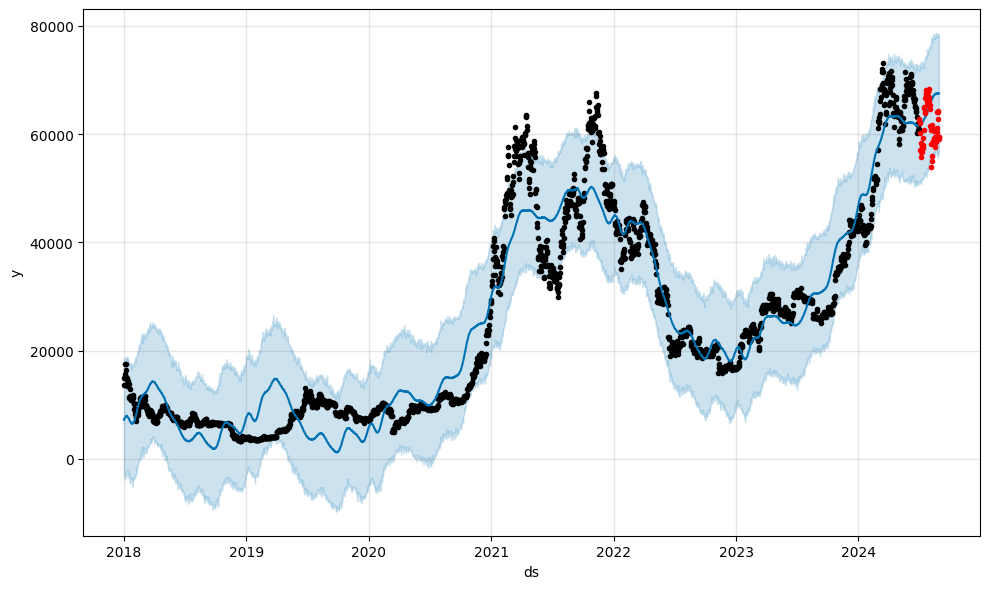

In [ ]:
# Visualizar el pronostico
fig = m.plot(forecast)
ax = fig.gca()
ax.plot( df_test["ds"], df_test["y"], 'r.')

# Paso 6: Descomposici√≥n de series temporales



En el paso 6, descompondremos el pron√≥stico de la serie temporal.

-
-

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

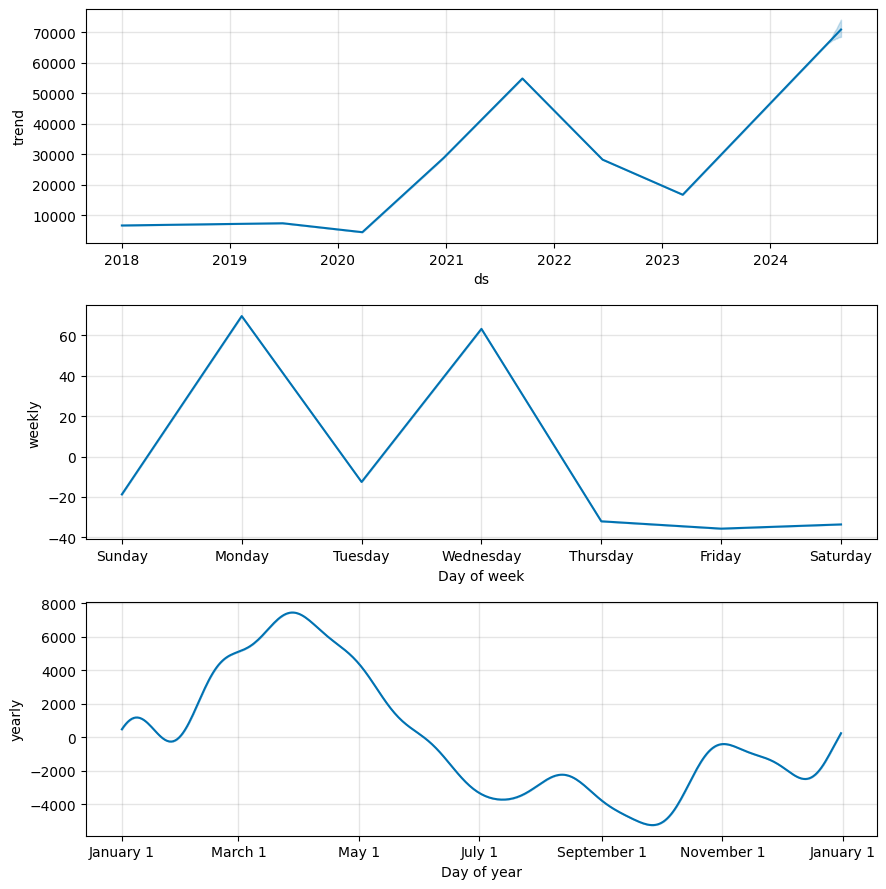

In [ ]:
# Visualizar las componentes
m.plot_components(forecast);

# Paso 7: identificar los puntos de cambio


En el paso 7, discutiremos c√≥mo identificar los puntos de cambio en la tendencia de la serie temporal.

Prophet identifica autom√°ticamente los puntos de cambio en los datos de series temporales siguiendo los pasos a continuaci√≥n:

- Utilice los datos del primer 80% de la serie temporal para identificar puntos de cambio. El valor predeterminado es 80% pero es un hiperpar√°metro que podemos cambiar.
- Identificar un gran n√∫mero de fechas distribuidas uniformemente con posibles cambios de trayectoria.
- Aplique un previo escaso a las magnitudes de la tasa de cambio, que es similar a la regularizaci√≥n L1.
Podemos listar las fechas correspondientes a los puntos de cambio usando `.changepoints`.


In [ ]:
# Puntos de cambio predeterminados
print(f'There are {len(m.changepoints)} change points. \nThe change points dates are \n{df.loc[df["ds"].isin(m.changepoints)]}')

There are 7 change points. 
The change points dates are 
             ds             y
271  2018-09-29   6601.959961
542  2019-06-27  11182.806641
813  2020-03-24   6734.803711
1083 2020-12-19  23869.832031
1354 2021-09-16  47783.359375
1625 2022-06-14  22206.792969
1896 2023-03-12  22163.949219


En la visualizaci√≥n, las l√≠neas de puntos rojas representan los puntos de cambio. No incluye los siete puntos de cambio del gr√°fico. S√≥lo se incluyen los que tienen m√°s cambios.

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



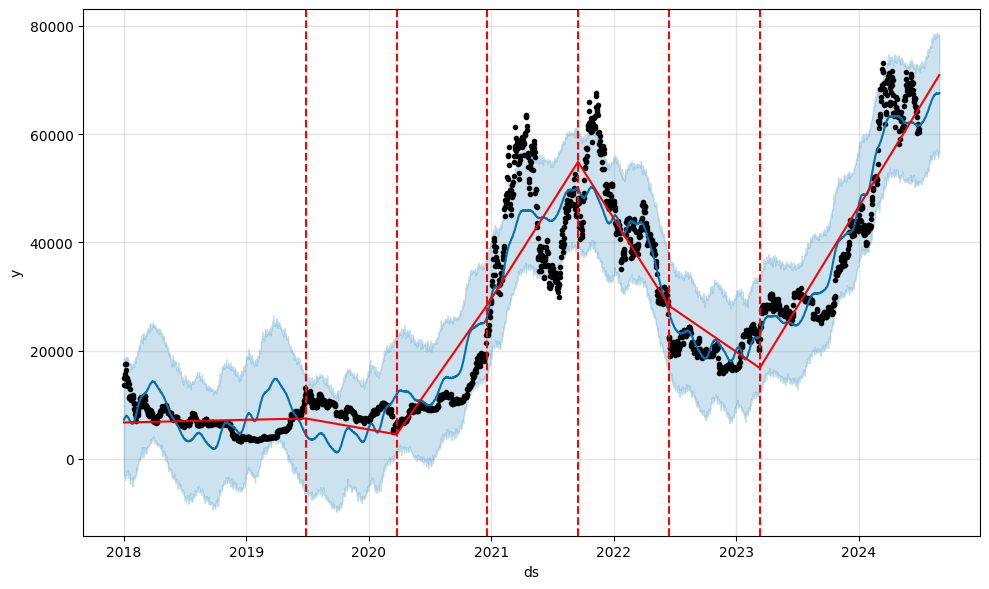

In [ ]:

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Paso 8: validaci√≥n cruzada


En el paso 8, realizaremos una validaci√≥n cruzada del modelo de series de tiempo. Prophet tiene una cross_validation funci√≥n para automatizar la comparaci√≥n entre los valores reales y previstos.

- m es el modelo entrenado.
- initial='500 days' significa que el modelo inicial se entrenar√° en los primeros 500 d√≠as de datos.
- period='60 days' significa que se agregar√°n 60 d√≠as al conjunto de datos de entrenamiento para cada modelo adicional.
- horizon = '30 days'significa que el modelo pronostica los pr√≥ximos 30 d√≠as. Cuando horizonse proporciona solo, el valor predeterminado de Prophet initiales el triple de horizon, y period la mitad de horizon.
- parallel="processes"permite el procesamiento paralelo para la validaci√≥n cruzada. Cuando la validaci√≥n cruzada paralela se pueda realizar en una sola m√°quina, processesproporcione el mayor rendimiento. Para problemas m√°s grandes, daskse puede utilizar para realizar una validaci√≥n cruzada en varias m√°quinas.




In [ ]:
# Cross validation
df_cv = cross_validation(m, initial='500 days', period='60 days', horizon = '30 days', parallel="processes")
df_cv.head()

ds         yhat   yhat_lower    yhat_upper             y     cutoff
0 2019-06-27  9293.863822  7805.530909  10572.663813  11182.806641 2019-06-26
1 2019-06-28  9390.087383  8064.840019  10690.773299  12407.332031 2019-06-26
2 2019-06-29  9501.609422  8130.175844  10877.919381  11959.371094 2019-06-26
3 2019-06-30  9527.972652  8131.720340  10825.151941  10817.155273 2019-06-26
4 2019-07-01  9548.691050  8145.434438  10966.674086  10583.134766 2019-06-26

# Paso 9: Evaluaci√≥n del desempe√±o del modelo Prophet


El paso 9 eval√∫a el desempe√±o del modelo de validaci√≥n cruzada.

- MSE (Error cuadr√°tico medio) resume la diferencia al cuadrado entre lo real y la predicci√≥n y se divide por el n√∫mero de predicciones.
- RMSE (error cuadr√°tico medio) toma la ra√≠z cuadrada de MSE.
- MAE (error absoluto medio) resume la diferencia absoluta entre lo real y la predicci√≥n y se divide por el n√∫mero de predicciones.
- MAPE (Error porcentual absoluto medio) resume la diferencia porcentual absoluta entre lo real y la predicci√≥n y se divide por el n√∫mero de predicciones. MAPE es independiente de la magnitud de los datos, por lo que puede usarse para comparar diferentes pron√≥sticos. Pero no est√° definido cuando el valor real es cero.
- MDAPE (Error porcentual absoluto medio) es similar a MAPE. La diferencia es que calcula la mediana en lugar de tomar el promedio de la diferencia porcentual absoluta.
- SMAPE (Error porcentual absoluto medio sim√©trico) es similar a MAPE. La diferencia es que al calcular el error porcentual absoluto, el denominador es el valor real de MAPE y el promedio del valor real y previsto de SMAPE.

In [ ]:
df_p = performance_metrics(df_cv)
df_p.head()


horizon           mse         rmse          mae      mape     mdape  \
0  3 days  5.102101e+07  7142.899154  5325.514174  0.173813  0.137880   
1  4 days  5.859408e+07  7654.677066  5688.432356  0.184976  0.141194   
2  5 days  6.498601e+07  8061.390013  5959.425239  0.194221  0.149866   
3  6 days  7.426377e+07  8617.642812  6267.499353  0.203251  0.156640   
4  7 days  8.081497e+07  8989.714898  6545.474140  0.213298  0.176641   

      smape  coverage  
0  0.185296  0.763441  
1  0.195854  0.720430  
2  0.204228  0.677419  
3  0.211967  0.645161  
4  0.221011  0.591398

`plot_cross_validation_metric` El m√©todo de Prophet nos ayuda a trazar los resultados del rendimiento de la validaci√≥n cruzada.

- El eje $x$ es el horizonte. Como establecimos el horizonte en 30 d√≠as, el eje x tiene un valor de hasta 30.
- El eje y es la m√©trica que nos interesa. La utilizamos mapecomo ejemplo en esta visualizaci√≥n.
- Cada d√≠a podemos ver tres puntos. Esto se debe a que hay tres modelos en la validaci√≥n cruzada y cada punto representa el MAPE de un modelo.
- La l√≠nea es el rendimiento agregado de todos los modelos. Podemos ver que el valor MAPE aumenta con los d√≠as, lo cual es de esperarse porque las series de tiempo tienden a hacer mejores predicciones para el futuro cercano que para el futuro lejano.

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

c:\Users\wsand\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



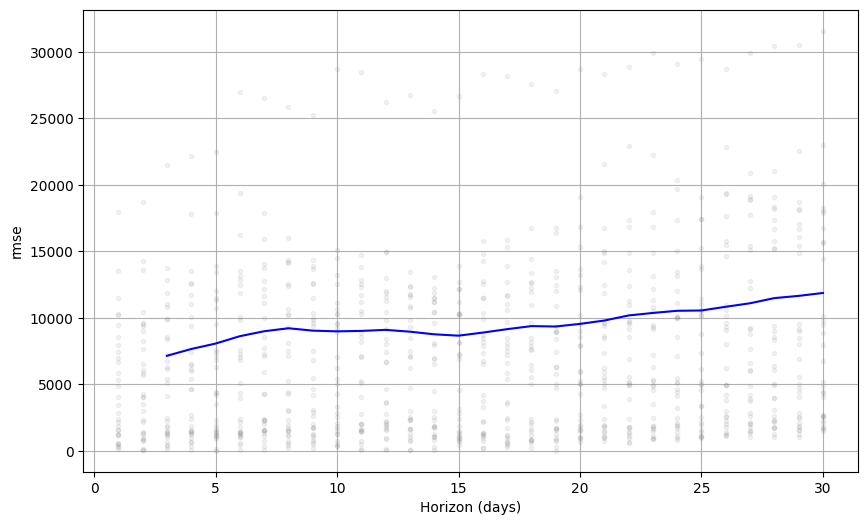

In [ ]:
# Visualizar las metricas
fig = plot_cross_validation_metric(df_cv, metric='rmse')

# Reference

* [Prophet documentation](https://facebook.github.io/prophet/docs/quick_start.html)
* [Prophet cross-validation and hyperparameter tuning](https://facebook.github.io/prophet/docs/diagnostics.html)
* [Prophet change point detection](https://facebook.github.io/prophet/docs/trend_changepoints.html)
